In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [26]:
df = pd.read_csv("./creditcard.csv")
df.shape

(284807, 31)

In [27]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<b> Let us plot the Class Distribution </b>

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

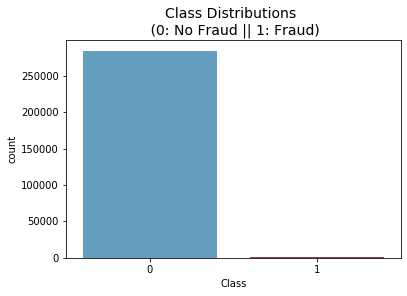

In [30]:
colors = ['#55a3cd', '#9c2f45']

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [29]:
# The classes are heavily skewed
print('Non Fraud/Genuine Transactions:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraudulent Transactions:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Non Fraud/Genuine Transactions: 99.83 % of the dataset
Fraudulent Transactions: 0.17 % of the dataset


<b>BoxPlots: </b>  To have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

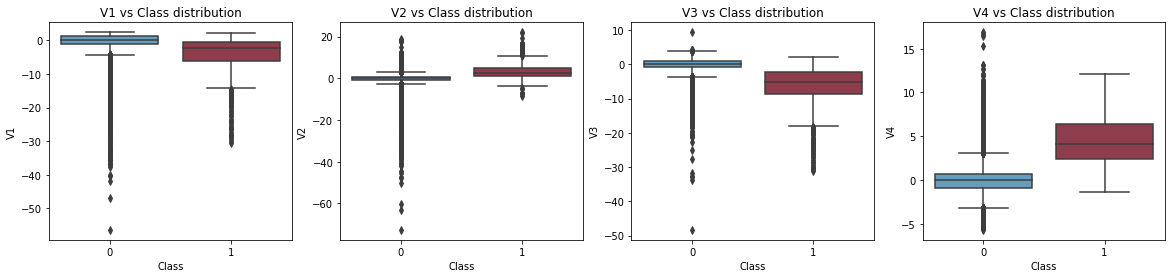

In [31]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V1", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V1 vs Class distribution')

sns.boxplot(x="Class", y="V2", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V2 vs Class distribution')

sns.boxplot(x="Class", y="V3", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V3 vs Class distribution')

sns.boxplot(x="Class", y="V4", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V4 vs Class distribution')

plt.show()

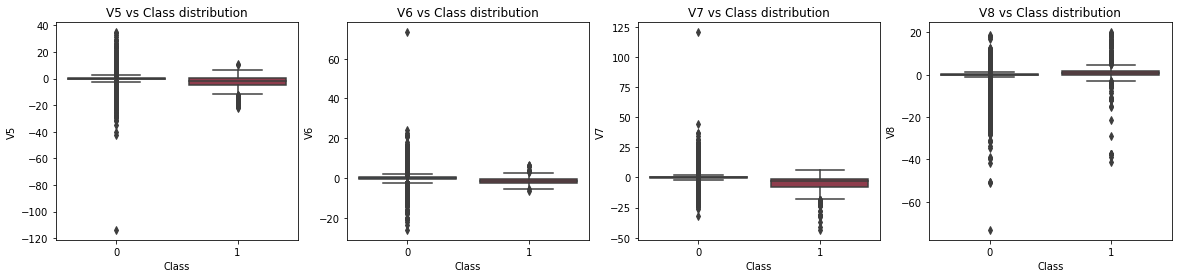

In [32]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V5", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V5 vs Class distribution')

sns.boxplot(x="Class", y="V6", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V6 vs Class distribution')

sns.boxplot(x="Class", y="V7", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V7 vs Class distribution')

sns.boxplot(x="Class", y="V8", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V8 vs Class distribution')

plt.show()

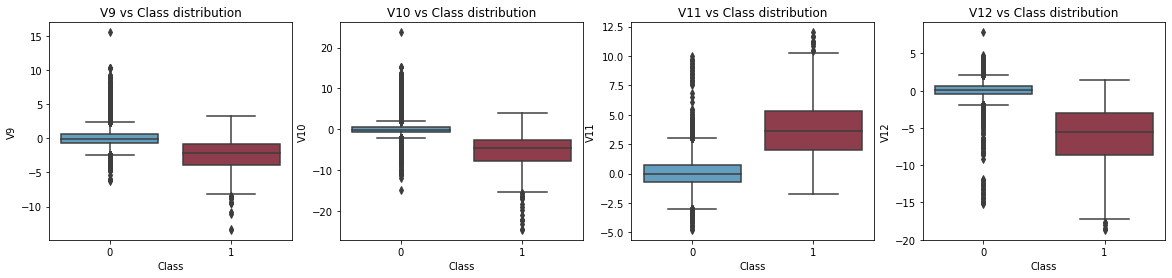

In [33]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V9", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V9 vs Class distribution')

sns.boxplot(x="Class", y="V10", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V10 vs Class distribution')

sns.boxplot(x="Class", y="V11", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V11 vs Class distribution')

sns.boxplot(x="Class", y="V12", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V12 vs Class distribution')

plt.show()

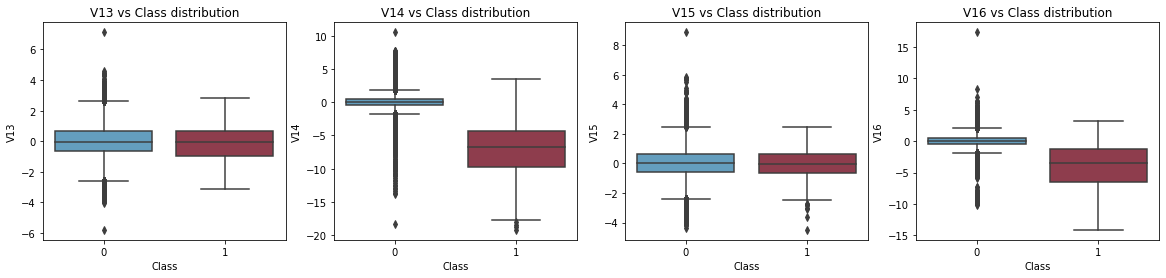

In [34]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V13", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V13 vs Class distribution')

sns.boxplot(x="Class", y="V14", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class distribution')

sns.boxplot(x="Class", y="V15", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V15 vs Class distribution')

sns.boxplot(x="Class", y="V16", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V16 vs Class distribution')

plt.show()

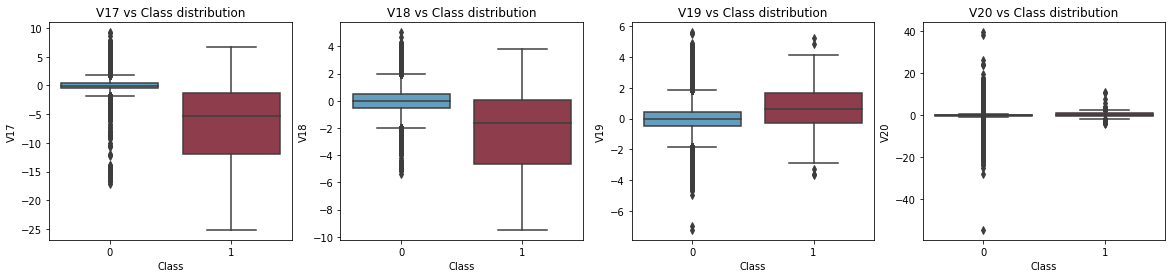

In [35]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class distribution')

sns.boxplot(x="Class", y="V18", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V18 vs Class distribution')

sns.boxplot(x="Class", y="V19", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V19 vs Class distribution')

sns.boxplot(x="Class", y="V20", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V20 vs Class distribution')

plt.show()

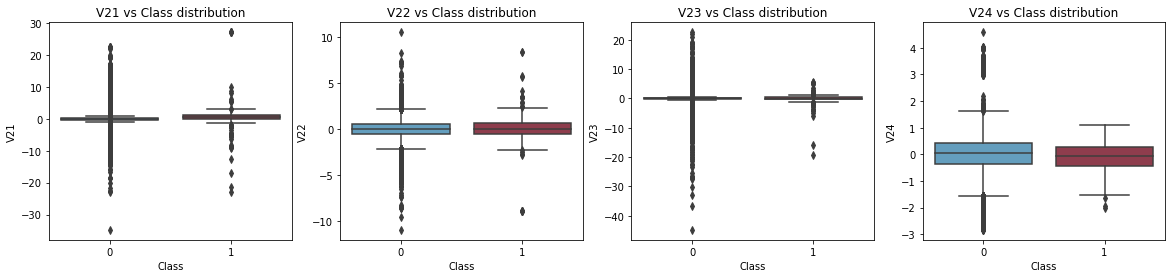

In [36]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V21", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V21 vs Class distribution')

sns.boxplot(x="Class", y="V22", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V22 vs Class distribution')

sns.boxplot(x="Class", y="V23", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V23 vs Class distribution')

sns.boxplot(x="Class", y="V24", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V24 vs Class distribution')

plt.show()

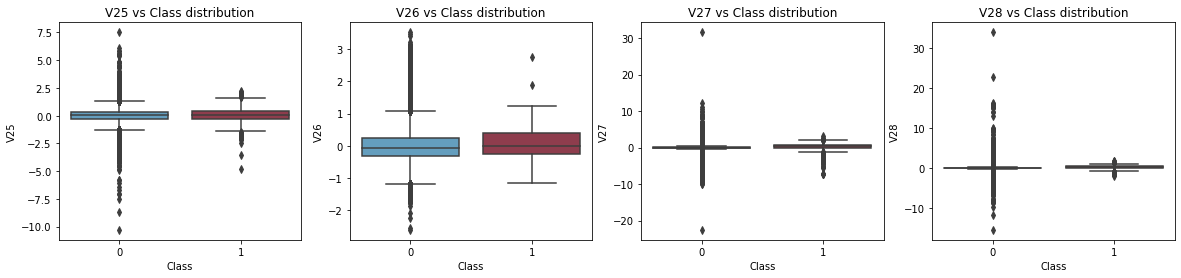

In [37]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V25", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V25 vs Class distribution')

sns.boxplot(x="Class", y="V26", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V26 vs Class distribution')

sns.boxplot(x="Class", y="V27", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V27 vs Class distribution')

sns.boxplot(x="Class", y="V28", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V28 vs Class distribution')

plt.show()

<b> From the above box-plots, we can see that v10, v12, v14 and v17 have negative correlations with our Class i.e the lower our feature value the more likely it will be a fraud transaction whereas V2, V4, V11 and V19 have positive correlations with our Class i.e the higher our feature value the more likely it will be a fraud transaction </b>

## Data Preprocessing:

In [38]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [39]:
# Since most of our data is already scaled, we need to scale the remaining columns (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# Let us use RobustScaler as it is less prone to outliers.

#std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [40]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Train and Test Split:

In [42]:
x = df.drop(['Class'], axis=1)
y = df['Class']
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=100)

In [43]:
y_train.shape, y_test.shape

((227845,), (56962,))

In [44]:
y_train.value_counts()/len(y_train)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [45]:
y_test.value_counts()/len(y_test)

0    0.99828
1    0.00172
Name: Class, dtype: float64

# Handling class imbalance using SMOTE technique:

In [46]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)

smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 227451, 1: 394})
After Counter({0: 227451, 1: 227451})


# Model Building:

In [47]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [48]:
# Test data prediction
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*70)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*70)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*70)
    print(roc_auc_score(y_test, y_prob[:,1]),"\n","\n")
    print('Accuracy Score')
    print('='*70)
    print(accuracy_score(y_test,y_pred),"\n")
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    aucroc.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)
    accuracy.append(accuracy_score(y_test,y_pred))


## Model-1: Logistic Regression

### a. Original Unsampled Data

In [49]:
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

C:\Users\anuro\Softwares\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.97496279        nan 0.97496937        nan 0.97496571
        nan 0.9750083         nan 0.97496218        nan 0.97523555
        nan 0.97496268        nan 0.97642762        nan 0.97496351
        nan 0.9796856         nan 0.97496611        nan 0.98221128
        nan 0.97499519        nan 0.98324204        nan 0.9779715
        nan 0.98344904        nan 0.98345308        nan 0.98234146
        nan 0.98436005        nan 0.98077284        nan 0.98371265
        nan 0.9795235         nan 0.98102381        nan 0.97898608
        nan 0.97860675        nan 0.97880089        nan 0.97783199
        nan 0.97869856        nan 0.9776966         nan 0.97869532]
  category=UserWarning


LogisticRegression(C=0.0011787686347935866)

In [50]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[56854    10]
 [   46    52]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.53      0.65        98

    accuracy                           1.00     56962
   macro avg       0.92      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9781261125722096


### b. SMOTE Resampling

In [51]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

C:\Users\anuro\Softwares\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.97709647        nan 0.97709646        nan 0.9771751
        nan 0.9771751         nan 0.97767047        nan 0.97767047
        nan 0.97993803        nan 0.97993803        nan 0.98397608
        nan 0.98397608        nan 0.98614771        nan 0.9861477
        nan 0.98733451        nan 0.98733451        nan 0.98829121
        nan 0.98829121        nan 0.9892868         nan 0.9892868
        nan 0.99005346        nan 0.99005352        nan 0.99050725
        nan 0.99050727        nan 0.99067879        nan 0.99067869
        nan 0.99072966        nan 0.9907296         nan 0.99073953
        nan 0.99073951        nan 0.99074122        nan 0.99074112]
  category=UserWarning


LogisticRegression(C=10.0)

In [52]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[55678  1186]
 [   12    86]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.88      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962
 

AUC-ROC
0.9738886480309625


## Model-2: Decision Tree

In [53]:
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

### a. Original Unsampled Data

In [54]:
tree_model = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=100)

In [55]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[56851    13]
 [   29    69]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.70      0.77        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9211442912843247


### b. SMOTE Resampling

In [56]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=100)

In [57]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

Confusion Matrix
[[56301   563]
 [   17    81]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.83      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.91      0.61     56962
weighted avg       1.00      0.99      0.99     56962
 

AUC-ROC
0.9063716651545255


## Model-3: Random Forest

### a. Original Unsampled Data

In [58]:
estimators = [2,10,30,50,100]
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=15, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomForestClassifier(max_depth=11, min_samples_split=50, n_estimators=50)

In [59]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[56855     9]
 [   27    71]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.72      0.80        98

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9543010964937466


### b. SMOTE Resampling

In [60]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomForestClassifier(max_depth=15, min_samples_split=100, n_estimators=30)

In [61]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

Confusion Matrix
[[56833    31]
 [   18    80]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.82      0.77        98

    accuracy                           1.00     56962
   macro avg       0.86      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9634415949835196


## Comparing various models:

In [62]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'auc-roc':aucroc,
                            'accuracy': accuracy})

In [63]:
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.838710,0.530612,0.650000,0.978126
1,Logistic Regression,smote,0.067610,0.877551,0.125547,0.973889
2,Decision Tree,actual,0.841463,0.704082,0.766667,0.921144
3,Decision Tree,smote,0.125776,0.826531,0.218329,0.906372
4,Random Forest,actual,0.887500,0.724490,0.797753,0.954301
5,Random Forest,smote,0.720721,0.816327,0.765550,0.963442


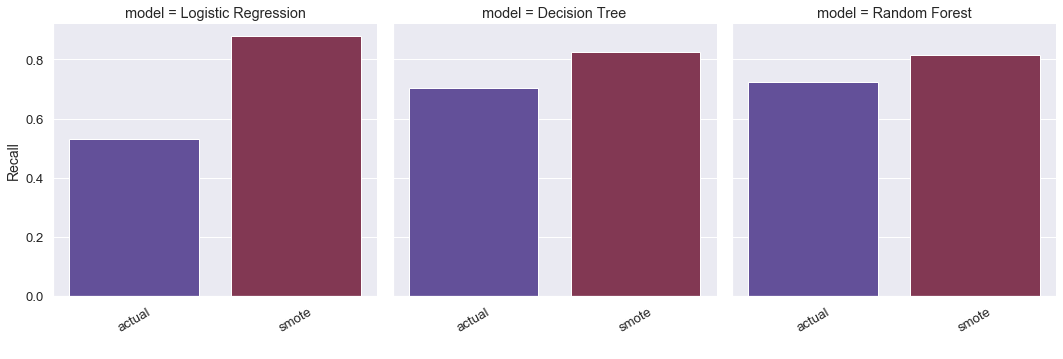

In [64]:
sns.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sns.barplot, "resample", "accuracy", palette='twilight', order=["actual", "smote"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Accuracy', fontsize=14)